In [1]:
import gecam

In [2]:
from gecam.data.base import EvtInfo

In [3]:
EvtInfo()

In [4]:
EvtInfo().a

1

In [1]:
import matplotlib.pyplot as plt

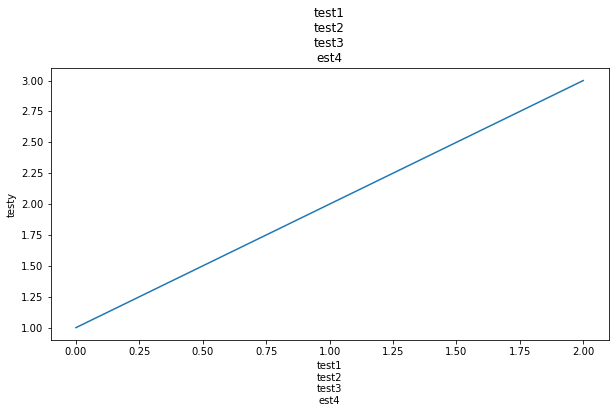

In [15]:
fig=plt.figure(figsize=(10,5))
plt.plot([1,2,3])
plt.title("test1\ntest2\ntest3\nest4")
plt.xlabel("test1\ntest2\ntest3\nest4")
plt.ylabel("testy")
# plt.subplots_adjust(top=1, bottom=0, right=1, left=0, hspace=0, wspace=0)
# plt.margins(0, 0)
# plt.show()
fig.savefig("test.png",bbox_inches = 'tight')

In [1]:
import numpy as np

In [2]:
def generate_time_bins(time_range, time_bin, trig_time=None):
    """
        generate time bins, ensure trig_time is the left edge of one bin.
        if trig_time out of time_range, always keep trig_time is the left edge of time_bins.
    Args:
        time_range (tuple): time range
        time_bin (float):  time bin, eg. 1s, 0.1s
        trig_time (float,optional):  trigger time
            if trigger_time is None, trigger time will be set to time_range[0]

    Returns:
        time_bins (np.array): time bins

        eg1:
            time_range=(-2, 2), time_bin=0.3, trig_time=None
            return: [-2.  -1.7 -1.4 -1.1 -0.8 -0.5 -0.2  0.1
                    0.4  0.7  1.   1.3  1.6  1.9 2.2]

        eg2:
            time_range=(-2, 2), time_bin=0.3, trig_time=0
            return: [-2.1 -1.8 -1.5 -1.2 -0.9 -0.6 -0.3  0.
                    0.3  0.6  0.9  1.2  1.5  1.8 2.1]
    """
    start_time, stop_time = time_range

    if trig_time is None:
        trig_time = start_time

    if trig_time < start_time or trig_time > stop_time:
        # if trig_time out of time_range, always keep trig_time is the left edge of time_bins
        start_time = trig_time - ((trig_time - start_time) // time_bin) * time_bin
        time_bins = np.arange(start_time, stop_time + time_bin, time_bin)
        return time_bins
    else:
        pre_time_bins = np.arange(trig_time, start_time - time_bin, -time_bin)
        post_time_bins = np.arange(trig_time, stop_time + time_bin, time_bin)
        time_bins = np.hstack((pre_time_bins[::-1], post_time_bins[1:]))
        return time_bins

In [10]:

trig_met=100.3
time_range=(trig_met-1,trig_met)
time_bins=generate_time_bins(time_range=time_range,time_bin=0.3,trig_time=trig_met)
time_bins-trig_met

array([-1.2, -0.9, -0.6, -0.3,  0. ])